In [38]:
# Варіант 1. Побудова багатошарової рекурентної нейронної мережі з розширеними LSTM шарами та Dropout для регуляризації
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
import warnings

warnings.simplefilter("ignore", UserWarning)

# Встановлюємо гіперпараметри
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32
embedding_dim = 64
lstm_units = 64

# Завантаження даних
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

# Передпроцесинг послідовних даних
input_train = pad_sequences(x_train, maxlen=maxlen)
input_test = pad_sequences(x_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до 
# послідовних даних тренувального та тестового наборів
print(input_train.shape)  
print(input_test.shape)

(25000, 500)
(25000, 500)


In [39]:
# Вивантаження словника
word_index = imdb.get_word_index()

# Виведення об'єму словника
print("Обсяг word_index:", len(word_index))

Обсяг word_index: 88584


In [40]:
# Додавання 3 до кожного індексу, оскільки індекси 0, 1 і 2 зарезервовані для "<PAD>", "<START>", "<UNK>"
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Створення зворотного словника
reverse_word_index = {value: key for key, value in word_index.items()}

# Функція для декодування рецензій
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])
# Вибір індексу рецензії, яку хочете роздрукувати
index = 5  # індекс рецензії, яку я хочу роздрукувати

# Перевірка та декодування рецензії
decoded_review = " ".join([reverse_word_index.get(k-3, '?') for k in input_train[index] if k > 3])

# Виведення закодованої та розкодованої рецензії
print("Приклад закодованої рецензії:", input_train[index])
print("Приклад розкодованої рецензії:", decoded_review)

Приклад закодованої рецензії: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  

In [41]:
# Побудова моделі LSTM
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))

# Додавання декількох Bidirectional LSTM шарів з Dropout шарами для регуляризації
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(0.5))
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, 
# щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

# Компіляція моделі з використанням оптимізатора Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

# Ініціалізація моделі для визначення форми шарів
model.build(input_shape=(None, maxlen))

# Виведення структури моделі
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 500, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 500, 128)            │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 804,993 (3.07 MB)

 Trainable params: 804,993 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Навчання моделі
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 301ms/step - acc: 0.6785 - loss: 0.5604 - val_acc: 0.7850 - val_loss: 0.4612
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 329ms/step - acc: 0.8254 - loss: 0.4166 - val_acc: 0.8468 - val_loss: 0.3504
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 320ms/step - acc: 0.8966 - loss: 0.2683 - val_acc: 0.8608 - val_loss: 0.3392
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - acc: 0.8937 - loss: 0.2811 - val_acc: 0.8764 - val_loss: 0.3164
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 324ms/step - acc: 0.9274 - loss: 0.1993 - val_acc: 0.8804 - val_loss: 0.3288
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 324ms/step - acc: 0.8945 - loss: 0.2967 - val_acc: 0.8838 - val_loss: 0.3061
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 324ms/step - acc: 0.9544 - loss: 0.1390 - val_acc: 0.8780 - val_loss: 0.3294
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - acc: 0.9674 - loss: 0.1103 - val_acc: 0.8884 - val_loss: 0.3173
Epoch 9/10
625/625 ━━━━━

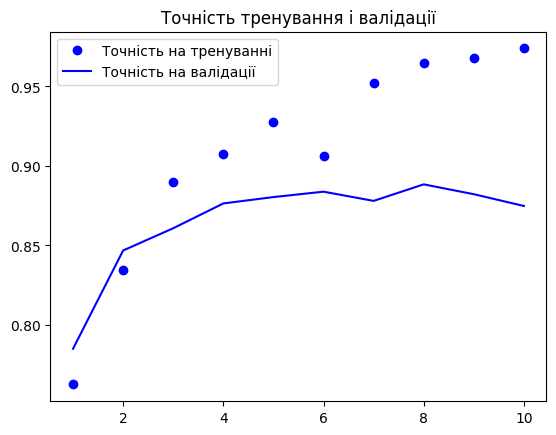

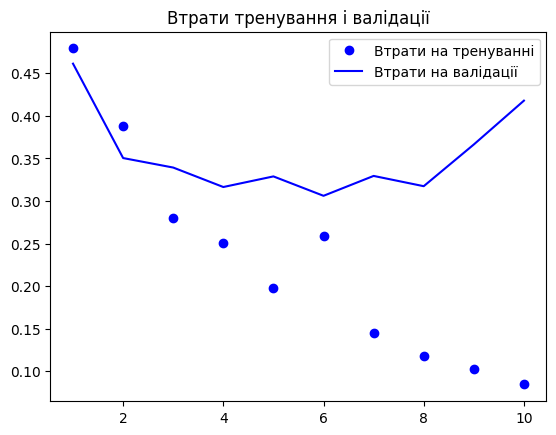

In [43]:
# Відображення результатів
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [46]:
# Перевірка кількох прогнозів
predictions = model.predict(input_test[:10])
for i, prediction in enumerate(predictions):
    predicted_label = 1 if prediction > 0.5 else 0
    true_label = y_test[i]
    print(f"Прогнозоване: {predicted_label}, Фактичне: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


Аналіз:
Прогнози моделі у більшості випадків співпадають з фактичними значеннями.
Висока точність (accuracy) досягнута на тестових даних (85.78%), що є позитивним показником.
Загальний Test Loss низький, що також свідчить про ефективність моделі в униканні перенавчання.

In [48]:
# Варіант 2. Побудова послідовної рекурентної нейронної мережі
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Встановлюємо гіперпараметри
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32
embedding_dim = 64
lstm_units = 64

# Завантаження даних
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Передпроцесинг послідовних даних
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Побудова моделі LSTM
model = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))

# Додавання LSTM шару з Dropout для регуляризації
model.add(LSTM(lstm_units))
model.add(Dropout(0.5))

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))

# Компіляція моделі з використанням оптимізатора Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

# Ініціалізація моделі для визначення форми шарів
model.build(input_shape=(None, maxlen))

# Виведення структури моделі
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 500, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Тренування моделі
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 127ms/step - acc: 0.6997 - loss: 0.5516 - val_acc: 0.8304 - val_loss: 0.3985
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - acc: 0.8787 - loss: 0.3101 - val_acc: 0.8454 - val_loss: 0.3562
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - acc: 0.8938 - loss: 0.2606 - val_acc: 0.8664 - val_loss: 0.3571
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - acc: 0.9216 - loss: 0.2151 - val_acc: 0.8626 - val_loss: 0.3454
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - acc: 0.9506 - loss: 0.1435 - val_acc: 0.8688 - val_loss: 0.3713
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - acc: 0.9668 - loss: 0.0957 - val_acc: 0.8576 - val_loss: 0.4579
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - acc: 0.9707 - loss: 0.0876 - val_acc: 0.8660 - val_loss: 0.4534
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - acc: 0.9673 - loss: 0.0989 - val_acc: 0.8666 - val_loss: 0.4925
Epoch 9/10
625/625 ━━━━━━━━━━━━━

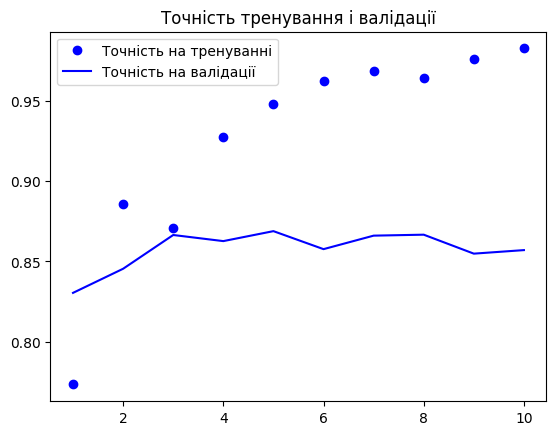

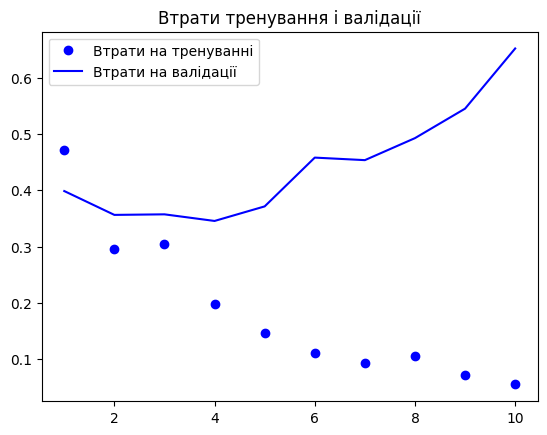

In [50]:
# Відображення результатів
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [51]:
# Перевірка кількох прогнозів
predictions = model.predict(input_test[:10])
for i, prediction in enumerate(predictions):
    predicted_label = 1 if prediction > 0.5 else 0
    true_label = y_test[i]
    print(f"Прогнозоване: {predicted_label}, Фактичне: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


In [ ]:
Аналіз:
Хоча Test Accuracy варіанту 2 також висока (85.48%), вона трохи нижча, ніж у варіанту 1.
Test Loss у варіанту 2 вищий, що може свідчити про більшу помилковість моделі на тестових даних.
Деякі прогнози моделі (наприклад, у випадках, коли прогнозоване значення 0, а фактичне 1) не збігаються з реальними значеннями, що вказує на можливу недооцінку моделлю деяких зразків.